<a href="https://colab.research.google.com/github/classob11/IEEE-2020/blob/master/2020_10_IEEE_AndesCon_DL_conR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

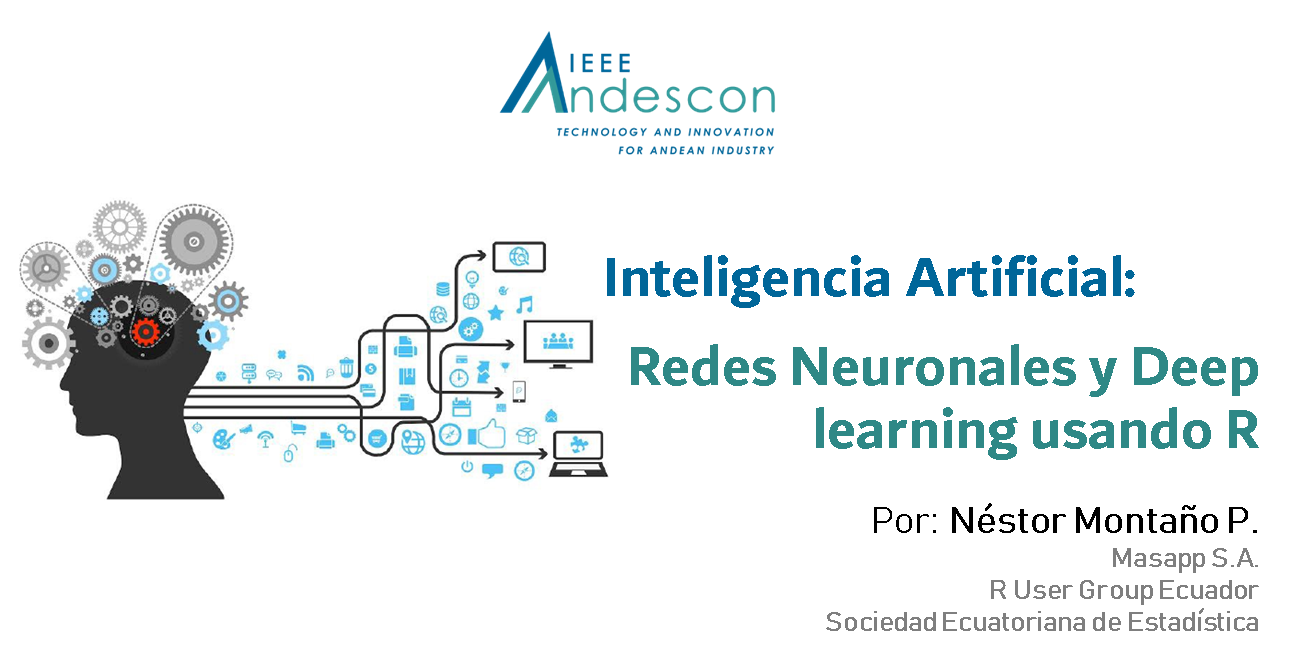

## Preeliminares



### Cargar paquetes

Para los que no vienen cargados por dafult se usa:  
if (!require("caret")) install.packages('caret')  
library('caret')

In [ ]:
# cargar librerías
library('tidyverse') 
library('ggplot2') 
library('scales')  
library('magrittr') 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [ ]:
if (!require("caret")) install.packages('caret')
library('caret')

Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caret’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
if (!require('RANN')) install.packages('RANN')
library('RANN')

Loading required package: RANN

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘RANN’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
if (!require('reticulate')) install.packages('reticulate')
library('reticulate')


Loading required package: reticulate

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reticulate’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘rappdirs’




In [ ]:
if (!require('keras')) install.packages('keras')
library('keras')

Loading required package: keras

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘keras’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘config’, ‘tensorflow’, ‘tfruns’, ‘zeallot’




In [ ]:
if (!require('prettyR')) install.packages('prettyR')
library('prettyR')

Loading required package: prettyR

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘prettyR’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Titanic: Machine Learning from Disaster

Problema encontrado desde:  
https://www.kaggle.com/c/titanic  
Siguiendo los pasos dados en:  
https://www.kaggle.com/nestormontano/keras-r-titanic

**Data**  
Pueden  descargar los dos csv que tiene kaggle, guardarlos como 'titanic_train.csv' y 'titanic_test.csv' para que no haya errores de lectura y luego subirlos a nuestro google colab (parte izquierda, tab de archivos). Lastimosamente no se puede activar Google Drive mientras usemos R. O pueden ejecutar las celdas donde se descarga la información compartida.

### Datos
Aquí se realiza la lectura de los .csv cargados.

In [ ]:
# https://drive.google.com/file/d/1D-3XqJfR1VKvDL_ZlpWecqGqfykmxDmr/view?usp=sharing
system("gdown --id 1D-3XqJfR1VKvDL_ZlpWecqGqfykmxDmr")

In [ ]:
# https://drive.google.com/file/d/1heLqNFoYnr_SGeT9R8gQXKELi0XyROOE/view?usp=sharing
system("gdown --id 1heLqNFoYnr_SGeT9R8gQXKELi0XyROOE")

In [ ]:
list.files()

[1] "sample_data"       "titanic_test.csv"  "titanic_train.csv"

In [ ]:
df_train <- read.csv('titanic_train.csv', stringsAsFactors = F)
df_test  <- read.csv('titanic_test.csv', stringsAsFactors = F)

Se realiza una unión de ambos datasets (esto para facilitar el manejo de los factores) y una exploración inicial de la data.



In [ ]:
# unir train y test
df_full  <- bind_rows(df_train, df_test) 

# Explorar
glimpse(df_full)

Rows: 1,309
Columns: 12
$ PassengerId <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ Survived    <int> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, …
$ Pclass      <int> 3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, …
$ Name        <chr> "Braund, Mr. Owen Harris", "Cumings, Mrs. John Bradley (F…
$ Sex         <chr> "male", "female", "female", "female", "male", "male", "ma…
$ Age         <dbl> 22, 38, 26, 35, 35, NA, 54, 2, 27, 14, 4, 58, 20, 39, 14,…
$ SibSp       <int> 1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1, …
$ Parch       <int> 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, …
$ Ticket      <chr> "A/5 21171", "PC 17599", "STON/O2. 3101282", "113803", "3…
$ Fare        <dbl> 7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 8.4583, 51.8625…
$ Cabin       <chr> "", "C85", "", "C123", "", "", "E46", "", "", "", "G6", "…
$ Embarked    <chr> "S", "C", "S", "S", "S", "Q", "S", "S", "S", "C", "S", "S…


## Preprocesamiento



### Nueva variable Titulo
A partir del nombre (que tiene forma: Apellido, Titulo Nombre), se crea una vairable título.

In [ ]:
## Crear variable titulo
df_full %<>% mutate(Title = gsub('(.*, )|(\\..*)', '', Name))
## Mostrar tabla de frecuencia de Title
df_full %>% group_by( Title) %>% summarise( FREC= n()) %>% arrange(-FREC)

`summarise()` ungrouping output (override with `.groups` argument)



Title,FREC
<chr>,<int>
Mr,757
Miss,260
Mrs,197
Master,61
Dr,8
Rev,8
Col,4
Major,2
Mlle,2


Se ven títulos con pocos datos, los agruparemos en un label llamado "otros"



In [ ]:
tabla_titulos <- df_full %>% group_by( Title) %>% summarise( FREC= n()) %>% mutate( Title_Final= ifelse(FREC<=8, "otros", Title))
df_full %<>% left_join(tabla_titulos)
df_full %>% group_by( Title_Final) %>% summarise( FREC= n()) %>% arrange(-FREC)

`summarise()` ungrouping output (override with `.groups` argument)

Joining, by = "Title"

`summarise()` ungrouping output (override with `.groups` argument)



Title_Final,FREC
<chr>,<int>
Mr,757
Miss,260
Mrs,197
Master,61
otros,34


A través de join agregaremos la nueva variable a los dataset de train & test



In [ ]:
df_train %<>% mutate(Title = gsub('(.*, )|(\\..*)', '', Name))
df_train %<>% left_join(tabla_titulos)

Joining, by = "Title"



In [ ]:
df_test %<>% mutate(Title = gsub('(.*, )|(\\..*)', '', Name))
df_test %<>% left_join(tabla_titulos)

Joining, by = "Title"



### Manejo de factores
Como vamos a crear variables Dummy, es importante tener los mismos niveles de factores en los dos dataset.

#### Setear los niveles

In [ ]:
level_sex <- unique(df_full$Sex )
level_Embarked  <- unique(df_full$Embarked )
level_Title_Final  <- unique(df_full$Title_Final  )
level_sex
level_Embarked
level_Title_Final

[1] "male"   "female"

[1] "S" "C" "Q" ""

[1] "Mr"     "Mrs"    "Miss"   "Master" "otros"

Aplicar el nivel a cada dataset

In [ ]:
df_train %<>% mutate(
    Sex= factor(Sex, levels=level_sex),
    Embarked= factor(Embarked, levels=level_Embarked),
    Title_Final= factor(Title_Final, levels=level_Title_Final)
)
table(df_train$Sex)
table(df_train$Embarked)
table(df_train$Title_Final)


  male female 
   577    314 


  S   C   Q     
644 168  77   2 


    Mr    Mrs   Miss Master  otros 
   517    125    182     40     27 

In [ ]:
df_test %<>% mutate(
    Sex= factor(Sex, levels=level_sex),
    Embarked= factor(Embarked, levels=level_Embarked),
    Title_Final= factor(Title_Final, levels=level_Title_Final)
)
table(df_test$Sex)
table(df_test$Embarked)
table(df_test$Title_Final)


  male female 
   266    152 


  S   C   Q     
270 102  46   0 


    Mr    Mrs   Miss Master  otros 
   240     72     78     21      7 

Una exploracion rápida de las variables numéricas



In [ ]:
prettyR::describe(df_train %>% select_if( is.numeric))

Description of df_train %>% select_if(is.numeric) 



 Numeric 
              mean median      var     sd valid.n
PassengerId 446.00 446.00 66231.00 257.35     891
Survived      0.38   0.00     0.24   0.49     891
Pclass        2.31   3.00     0.70   0.84     891
Age          29.70  28.00   211.02  14.53     714
SibSp         0.52   0.00     1.22   1.10     891
Parch         0.38   0.00     0.65   0.81     891
Fare         32.20  14.45  2469.44  49.69     891
FREC        522.88 757.00 78619.21 280.39     891

 Debemos eliminar todas las variables que no deben ser consideradas. 

In [ ]:
df_test_mod <- df_test %>% select(-PassengerId, -Title, -Name, -Ticket, -Cabin, -FREC)
df_train_mod <- df_train %>% select(-PassengerId, -Title, -Name, -Ticket, -Cabin, -FREC)
# df_train_mod %<>% mutate(Survived= factor( ifelse(Survived== 0, "No", "Si") ))
glimpse(df_train_mod)

Rows: 891
Columns: 9
$ Survived    <int> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, …
$ Pclass      <int> 3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, …
$ Sex         <fct> male, female, female, female, male, male, male, male, fem…
$ Age         <dbl> 22, 38, 26, 35, 35, NA, 54, 2, 27, 14, 4, 58, 20, 39, 14,…
$ SibSp       <int> 1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1, …
$ Parch       <int> 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, …
$ Fare        <dbl> 7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 8.4583, 51.8625…
$ Embarked    <fct> S, C, S, S, S, Q, S, S, S, C, S, S, S, S, S, S, Q, S, S, …
$ Title_Final <fct> Mr, Mrs, Miss, Mrs, Mr, Mr, Mr, Master, Mrs, Mrs, Miss, M…


### Setear preprocesamiento
Con caret se aplicará el preprocesamiento, es importante guardar los parámetros del preprocesamiento para aplicarlos a la data de prueba

In [ ]:
preprocessParams <- preProcess(df_train_mod %>% select(-Survived), method=c("center", "scale", 'knnImpute'))
print(preprocessParams)

Created from 714 samples and 8 variables

Pre-processing:
  - centered (5)
  - ignored (3)
  - 5 nearest neighbor imputation (5)
  - scaled (5)



In [ ]:
# Aplicar preprocesamiento al train
df_train_prep <- predict(preprocessParams, df_train_mod)
# Explorar
prettyR::describe(df_train_prep %>% select_if( is.numeric))

Description of df_train_prep %>% select_if(is.numeric) 



 Numeric 
          mean median  var   sd valid.n
Survived  0.38   0.00 0.24 0.49     891
Pclass    0.00   0.83 1.00 1.00     891
Age      -0.01  -0.05 0.87 0.94     891
SibSp     0.00  -0.47 1.00 1.00     891
Parch     0.00  -0.47 1.00 1.00     891
Fare      0.00  -0.36 1.00 1.00     891

¿Cuán balanceada está la data?

In [ ]:
df_train_prep %$% table(Survived)


Survived
  0   1 
549 342 

Ver cantida de missings

In [ ]:
df_train_prep %>% select_if( is.factor) %>% map_df(function(x) sum(is.na(x)))

Sex,Embarked,Title_Final
<int>,<int>,<int>
0,0,0


### Dummy

Crear variables dummy desde la data full sin variables de identificación ni la variable dependiente.

In [ ]:
## Crear variables dummy
modelDummy <- dummyVars(Survived ~ ., data = df_full %>% select(-PassengerId, -Title, -Name, -Ticket, -Cabin, -FREC))
names(df_train_prep)
df_train_prep_y <- df_train_prep %>% dplyr::select(Survived)
df_train_prep_x <- as_tibble(predict(modelDummy, df_train_prep))
names(df_train_prep_x)
glimpse(df_train_prep_x)

[1] "Survived"    "Pclass"      "Sex"         "Age"         "SibSp"      
[6] "Parch"       "Fare"        "Embarked"    "Title_Final"

[1] "Pclass"            "Sexmale"           "Sexfemale"        
 [4] "Age"               "SibSp"             "Parch"            
 [7] "Fare"              "EmbarkedS"         "EmbarkedC"        
[10] "EmbarkedQ"         "Embarked"          "Title_FinalMr"    
[13] "Title_FinalMrs"    "Title_FinalMiss"   "Title_FinalMaster"
[16] "Title_Finalotros"

Rows: 891
Columns: 16
$ Pclass            <dbl> 0.8269128, -1.5652278, 0.8269128, -1.5652278, 0.826…
$ Sexmale           <dbl> 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, …
$ Sexfemale         <dbl> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, …
$ Age               <dbl> -0.53000510, 0.57143041, -0.25464622, 0.36491125, 0…
$ SibSp             <dbl> 0.4325504, 0.4325504, -0.4742788, 0.4325504, -0.474…
$ Parch             <dbl> -0.4734077, -0.4734077, -0.4734077, -0.4734077, -0.…
$ Fare              <dbl> -0.50216314, 0.78640362, -0.48857985, 0.42049407, -…
$ EmbarkedS         <dbl> 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, …
$ EmbarkedC         <dbl> 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ EmbarkedQ         <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, …
$ Embarked          <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Title_FinalMr     <dbl> 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, …
$ Title_FinalMrs    <dbl> 0, 1

## Un primer modelo en Keras


### Arquitectura y compilador
Especificar arquitectura & configurar la compilación

In [ ]:
set.seed(123)
model <- keras_model_sequential()
model %>%
layer_dense(units = 18, activation = 'relu', input_shape = c(16)) %>%
layer_dense(units = 60, activation = 'relu') %>%
layer_dense(units = 15, activation = 'relu') %>%
layer_dense(units = 1, activation = 'sigmoid') %>%
compile(
optimizer = optimizer_adam(),
loss = 'binary_crossentropy',
metrics = c('accuracy')
)
summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 18)                      306         
________________________________________________________________________________
dense_1 (Dense)                     (None, 60)                      1140        
________________________________________________________________________________
dense_2 (Dense)                     (None, 15)                      915         
________________________________________________________________________________
dense_3 (Dense)                     (None, 1)                       16          
Total params: 2,377
Trainable params: 2,377
Non-trainable params: 0
________________________________________________________________________________


### Convertir a matrices para Keras

Keras recibe sólo matrices, así que debemos transformar todo a matrices



In [ ]:
m_train_prep_x <- as.matrix( as.data.frame(df_train_prep_x))
head(m_train_prep_x)

Pclass,Sexmale,Sexfemale,Age,SibSp,Parch,Fare,EmbarkedS,EmbarkedC,EmbarkedQ,Embarked,Title_FinalMr,Title_FinalMrs,Title_FinalMiss,Title_FinalMaster,Title_Finalotros
0.8269128,1,0,-0.5300051,0.4325504,-0.4734077,-0.5021631,1,0,0,0,1,0,0,0,0
-1.5652278,0,1,0.5714304,0.4325504,-0.4734077,0.7864036,0,1,0,0,0,1,0,0,0
0.8269128,0,1,-0.2546462,-0.4742788,-0.4734077,-0.4885799,1,0,0,0,0,0,1,0,0
-1.5652278,0,1,0.3649113,0.4325504,-0.4734077,0.4204941,1,0,0,0,0,1,0,0,0
0.8269128,1,0,0.3649113,-0.4742788,-0.4734077,-0.4860644,1,0,0,0,1,0,0,0,0
0.8269128,1,0,-0.3234859,-0.4742788,-0.4734077,-0.4778481,0,0,1,0,1,0,0,0,0


In [ ]:
m_train_prep_y <- as.matrix( as.data.frame(df_train_prep_y))
table(m_train_prep_y)

m_train_prep_y
  0   1 
549 342 

### Entrenar (fit) 
Aquí se ajustan los pesos del modelo, ademáás, se puede grabar los resultados de los epoch al poner "history <-"

In [ ]:
history <- model %>% fit(m_train_prep_x, m_train_prep_y, epochs = 200, batch_size = 32,
validation_split = 0.2)


In [ ]:
str(history)


List of 2
 $ params :List of 3
  ..$ verbose: int 1
  ..$ epochs : int 200
  ..$ steps  : int 23
 $ metrics:List of 4
  ..$ loss        : num [1:200] 0.583 0.52 0.484 0.46 0.446 ...
  ..$ accuracy    : num [1:200] 0.691 0.794 0.802 0.805 0.813 ...
  ..$ val_loss    : num [1:200] 0.498 0.433 0.4 0.384 0.372 ...
  ..$ val_accuracy: num [1:200] 0.788 0.855 0.855 0.849 0.86 ...
 - attr(*, "class")= chr "keras_training_history"


In [ ]:
model

Model
Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 18)                      306         
________________________________________________________________________________
dense_1 (Dense)                     (None, 60)                      1140        
________________________________________________________________________________
dense_2 (Dense)                     (None, 15)                      915         
________________________________________________________________________________
dense_3 (Dense)                     (None, 1)                       16          
Total params: 2,377
Trainable params: 2,377
Non-trainable params: 0
________________________________________________________________________________



### Evaluar el modelo
Loss: Valor de la función de pérdida o costo a minimizar.  
Acc: Accuracy, precisión de la predicción

In [ ]:
model %>% evaluate(m_train_prep_x, m_train_prep_y)


loss  accuracy 
0.2923626 0.8866442

In [ ]:
keras_pred_train <- model %>% predict_classes(m_train_prep_x)
table(Predicted = keras_pred_train, Actual = m_train_prep_y)

         Actual
Predicted   0   1
        0 516  68
        1  33 274

`geom_smooth()` using formula 'y ~ x'



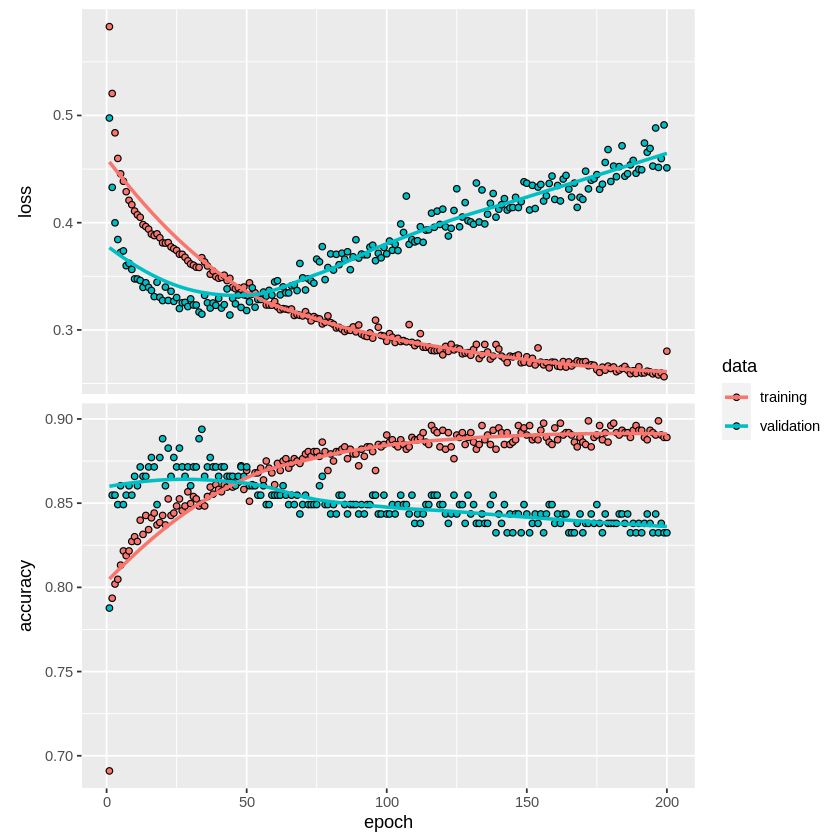

In [ ]:
plot(history)


### HAY SOBREAJUSTE, DEBERIAMOS DISMINUIR EL EPOCH

Otros comandos importantes

In [ ]:
get_config(model) # Componentes de la configuracion

{'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 16), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_input'}}, {'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'batch_input_shape': (None, 16), 'dtype': 'float32', 'units': 18, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 60, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regulariz

In [ ]:
model$layers # Lista de capas


[[1]]
<tensorflow.python.keras.layers.core.Dense>

[[2]]
<tensorflow.python.keras.layers.core.Dense>

[[3]]
<tensorflow.python.keras.layers.core.Dense>

[[4]]
<tensorflow.python.keras.layers.core.Dense>


In [ ]:
model$inputs


[[1]]
Tensor("dense_input:0", shape=(None, 16), dtype=float32)


Podemos tambien predecir la probabilidad, no sólo la clase



In [ ]:
prob <- model %>% predict_proba(m_train_prep_x)
head(prob)

0.22884545
0.99995220
0.56879139
0.99975044
0.08790147
0.01048828


### Predecir en el test

In [ ]:
df_test_prep <- predict(preprocessParams, df_test_mod)
df_test_prep %<>% mutate(Survived=NA)
df_test_prep_x <- as_tibble(predict(modelDummy, df_test_prep))
df_test_prep_y <- df_test_prep %>% dplyr::select(Survived)
m_test_prep_x <- as.matrix( as.data.frame(df_test_prep_x))
head(m_test_prep_x)

Predecir las clases (clasificación)



In [ ]:
keras_pred_test <- model %>% predict_classes(m_test_prep_x)

table(keras_pred_test)

## Un segundo modelo en Keras

Ahora sí, a probar alguna arquitectura que resuelva el modelo, **tu primer red neuronal usando keras**:

In [ ]:
set.seed(123)
model <- keras_model_sequential()
model %>%
layer_dense(units = 18, activation = 'relu', input_shape = c(16)) %>%
layer_dense(units = 60, activation = 'relu') %>%
layer_dense(units = 15, activation = 'relu') %>%
layer_dense(units = 1, activation = 'sigmoid') %>%
compile(
optimizer = optimizer_adam(),
loss = 'binary_crossentropy',
metrics = c('accuracy')
)
summary(model)

In [ ]:
history <- model %>% fit(m_train_prep_x, m_train_prep_y, epochs = 200, batch_size = 32,
validation_split = 0.2)

In [ ]:
model %>% evaluate(m_train_prep_x, m_train_prep_y)

In [ ]:
plot(history)

# MNIST con Red Neuronal Convolucional


## Importar los Datos
Importaremos la data a objetos de tipo data frame

In [ ]:
#https://drive.google.com/file/d/1qymO-sJDh6blZLZ3w2FRnElQODQ3k4-w/view?usp=sharing
system("gdown --id 1qymO-sJDh6blZLZ3w2FRnElQODQ3k4-w")

In [ ]:
# https://drive.google.com/file/d/1az0ydMMcjWaz8-CJmulNR3bmV6BpYRdD/view?usp=sharing
system("gdown --id 1az0ydMMcjWaz8-CJmulNR3bmV6BpYRdD")

In [ ]:
list.files()

[1] "sample_data"       "test.csv"          "titanic_test.csv" 
[4] "titanic_train.csv" "train.csv"

In [ ]:
## Importar la data
mnist_train <- read_csv("train.csv")
mnist_test <- read_csv("test.csv")

Parsed with column specification:
cols(
  .default = col_double()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double()
)

See spec(...) for full column specifications.



## Entender la data

Luego de importar, debemos centrarnos en entender la data que se tiene (esto habiendo ya entendido el problema o proyecto que se está analizando).  
Entonces, recordemos que cada fila representa la imagen en blanco y negro de un número escrito a mano; cada columna corresponde a un pixel y los valores de cada celda representa la luminosidad de la imagen y toma valores de 0 a 255.  
Además hay que recalcar que el objetivo es construir un modelo al que se le ingrese una imagen y este nos diga qué número está escrito en dicha imagen.  
  
Ahora vamos a listar las variables que tenemos junto con el tipo de dato de cada una, esto nos permite evaluar si necesitamos cambiar los tipos de datos.  
Nótese que tenemos dos datos:  
**_Train_**: Conjunto de datos que tiene los valores de la imagen junto con el número al que corresponde dicha imagen,  
**_Test_**: Conjunto de datos que tiene los valores de la imagen, pero SIN saber el valor que que representa esta imagen. Eso es así debido a que la idea es que uds envíen sus resultados a kaggle y ellos les digan cuán acertado es su modelo (y para ello uds no deberían saber la respuesta).

In [ ]:
## Explorar Data
## Glimpse permite tener un listado de las variables,  
## junto con el tipo de datos y los primeros valores
glimpse(mnist_train)

Rows: 42,000
Columns: 785
$ label    <dbl> 1, 0, 1, 4, 0, 0, 7, 3, 5, 3, 8, 9, 1, 3, 3, 1, 2, 0, 7, 5, …
$ pixel0   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel1   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel2   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel3   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel4   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel5   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel6   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel7   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel8   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel9   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel10  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel11  <dbl> 0, 0, 0, 

In [ ]:
## Explorar Data
## Glimpse permite tener un listado de las variables,  
## junto con el tipo de datos y los primeros valores
glimpse(mnist_test)

Rows: 28,000
Columns: 784
$ pixel0   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel1   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel2   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel3   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel4   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel5   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel6   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel7   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel8   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel9   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel10  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel11  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ pixel12  <dbl> 0, 0, 0, 

## Manipular y Explorar la Data

Para modelar usaremos una red neuronal de tipo convolucional, para esto necesitamos que nuestra data de entrenamiento TRAIN esté separada en "x" y "y".

In [ ]:
## Separar la data en x,y
df_x_train <- mnist_train %>% select(-label)
df_y_train <- mnist_train %>% select(label)
df_x_test <- mnist_test

In [ ]:
## Sólo para ver que efectivamente se hizo
dim(mnist_train)
dim(df_x_train)

[1] 42000   785

[1] 42000   784

### Explorar

Para explorar vamos a reconstruir la imagen poniéndole como label el valor real**

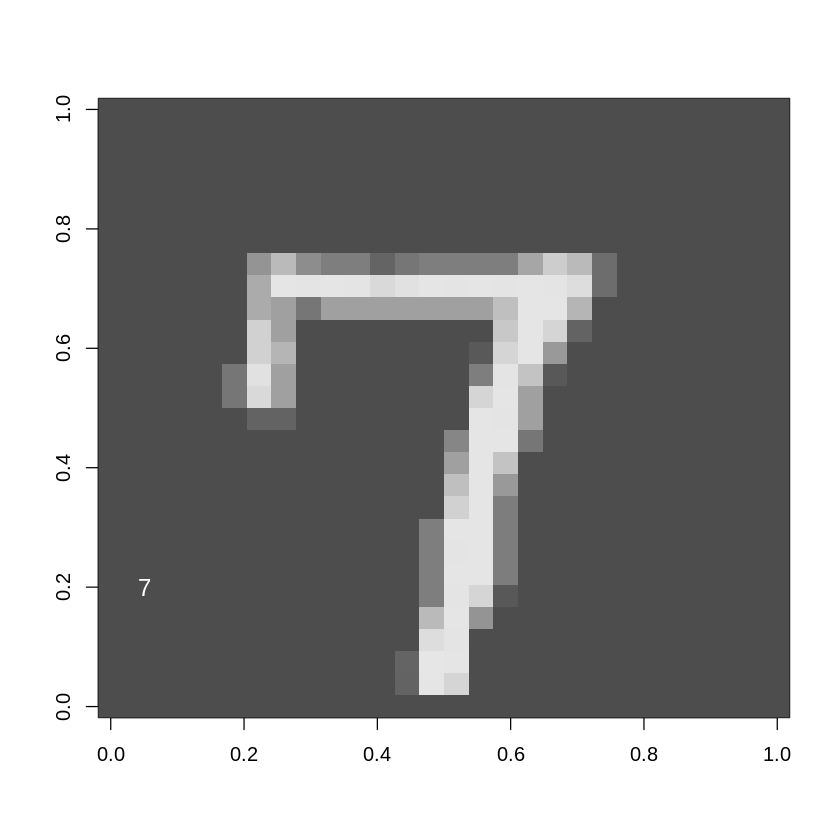

In [ ]:
## Grafiquemos una de nuestras imagenes
m <- matrix( unlist(df_x_train[7,]), nrow=28, byrow=TRUE)
rotate <- function(x) t(apply(x, 2, rev))
image( rotate(m), col=grey.colors(255))
    text(0.05, 0.2, col="white", cex=1.2, df_y_train[7, 1])

In [ ]:
# Ahora hagamos una función que permita graficar en grupo

graficaImagen <- function(rango){
  param_orig <- par(no.readonly=TRUE)
  # dimension del recuadro
  dim_rec <- ceiling(sqrt(length(rango)))
  par(mfrow=c(dim_rec, dim_rec), mar=c(.1, .1, .1, .1))
  
  for (i in rango){ #reverse and transpose each matrix to rotate images
    m <- matrix(unlist(df_x_train[i,]), nrow=28, byrow=TRUE)
    m <- apply(m, 2, rev)
    image(z= t(m), col=grey.colors(255), axes=FALSE)
    text(0.05, 0.2, col="white", cex=1.2, df_y_train[i, 1])
  }
  par(param_orig) #reset the original graphics parameters
}

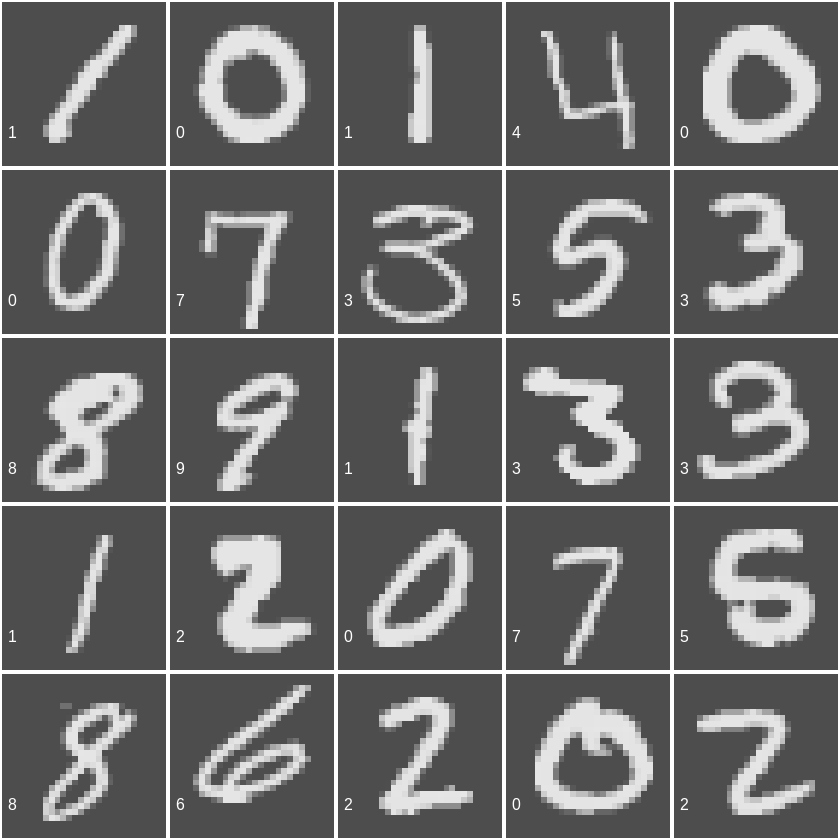

In [ ]:
graficaImagen(1:25)


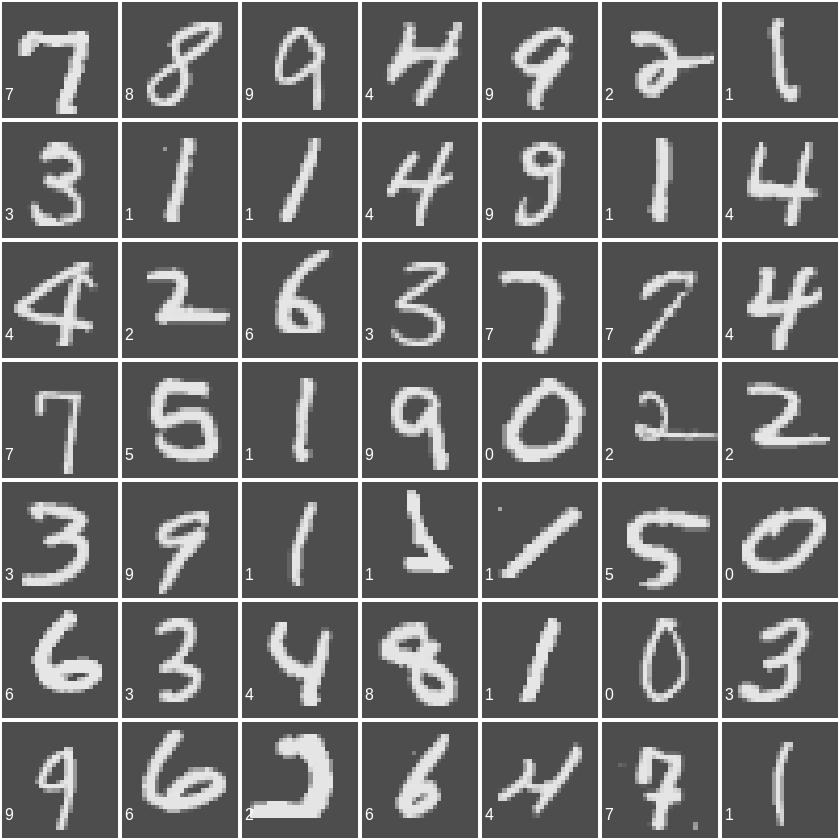

In [ ]:
graficaImagen(30:78)


### Poner la data en la forma que lo requiere keras

Keras no recibe data.frames, debemos pasar a matrices

In [ ]:
# Keras solo recibe matrices
x_train <- data.matrix(df_x_train)
y_train <- data.matrix(df_y_train)
x_test <- data.matrix(df_x_test)

Además, el "y" de nuestra data de entrenamiento al ser una variable de varias categorías, debemos pasarla a una matriz donde cada columna represente un label (1, 2, ..., 9) y cada fila tiene 1 si ese es el label de la imagen y 0 si no. Este proceso se conoce como One Hot Encoding

In [ ]:
# One hot encoding en el y_train
y_train <- to_categorical(y_train, 10)

In [ ]:
# Ver la matriz y_train que resulta luego dle one hot encoding
head(y_train)


0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0


Para las redes neuronales se requiere que la data esté escalada, así que haremos que toda la data de los pixeles (los "x") esté en valores entre 0 y 1, esto lo hacemos dividiendo para 255.

In [ ]:
# Transformar en rango de 0 a 1 
x_train <- x_train/255
x_test <- x_test/255

In [ ]:
head(x_train)

pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,⋯,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Finalmente, transformamos cada fila a un array 28 x 28 (que son los pixeles) x 1; nuestro train es un objeto que contiene 784 (antes filas) arrays de 28 x 28 x 1

In [ ]:
# Redimensionar
x_train <- array_reshape( x_train, c(nrow(x_train), 28, 28, 1) )
x_test <- array_reshape( x_test, c(nrow(x_test), 28, 28, 1) )

## Modelo de Red Neuronal

En keras, una de las formas para definir una red neuronal es usar un proceso secuencial, donde se van definiendo las capas de nuestra red.  
Primero se arma la arquitectura del modelo, luego se define parámetros de compilación como optimizador y función de pérdida y finlmente se manda a ajustar el modelo.

In [ ]:
# Definir modelo: estructura de la red y optimizador
set.seed(123)
model_cnn <- keras_model_sequential() %>%
  layer_conv_2d(filters = 32, kernel_size = c(3,3), activation = 'relu',
                input_shape = c(28, 28, 1)) %>% 
  layer_conv_2d(filters = 64, kernel_size = c(3,3), activation = 'relu') %>% 
  layer_max_pooling_2d(pool_size = c(2, 2)) %>% 
  layer_dropout(rate = 0.25) %>% 
  layer_flatten() %>% 
  layer_dense(units = 128, activation = 'relu') %>% 
  layer_dropout(rate = 0.5) %>% 
  layer_dense(units = 10, activation = 'softmax')

In [ ]:
## Ver la arquitectura armada
summary(model_cnn)

Model: "sequential_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d (Conv2D)                     (None, 26, 26, 32)              320         
________________________________________________________________________________
conv2d_1 (Conv2D)                   (None, 24, 24, 64)              18496       
________________________________________________________________________________
max_pooling2d (MaxPooling2D)        (None, 12, 12, 64)              0           
________________________________________________________________________________
dropout (Dropout)                   (None, 12, 12, 64)              0           
________________________________________________________________________________
flatten (Flatten)                   (None, 9216)                    0           
________________________________________________________________________________
dense_

In [ ]:
## Definir parametros de compilación
model_cnn %>% 
   compile(
    optimizer= optimizer_rmsprop(),
    loss='categorical_crossentropy',
    metrics='accuracy')

In [ ]:
# Aqui se ajusta el modelo
## Esto toma su tiempo
history <- model_cnn %>% fit(
  x_train, y_train, 
  epochs = 20, batch_size = 128, 
  validation_split = 0.2
)

`geom_smooth()` using formula 'y ~ x'



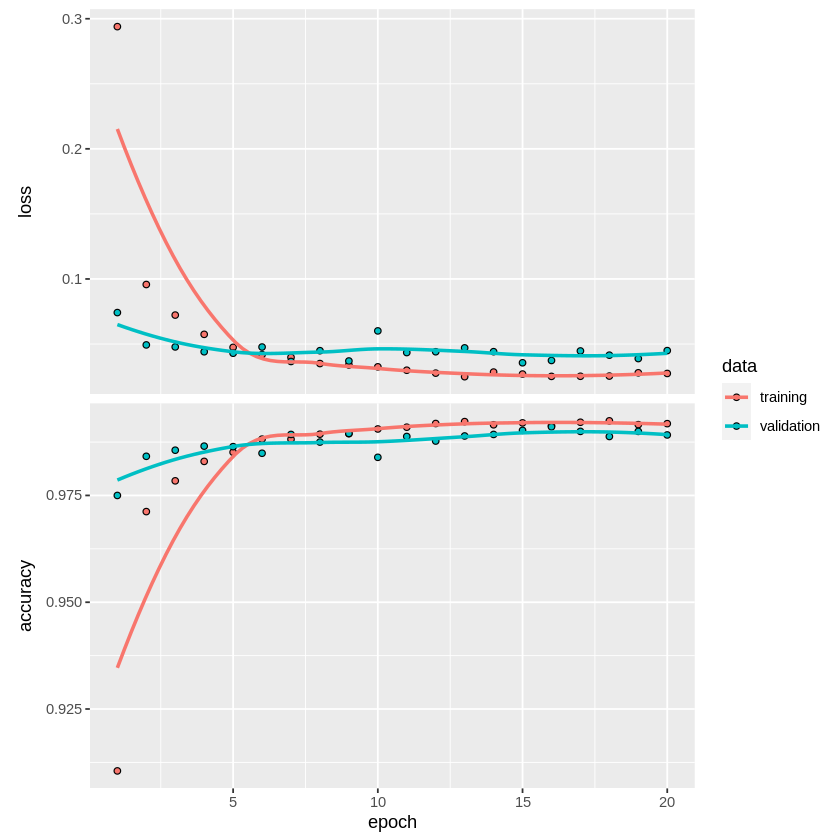

In [ ]:
## Graficar la función de pérdida tanto en el train como en la validación 
plot(history)

In [ ]:
# Evaluar el modelo
model_cnn %>% evaluate(x_train, y_train)

loss   accuracy 
0.01344268 0.99659526

### Ahora veamos los resultados en el test

En el train podemos tener problemas de sobreajuste y otros más, así que veamos que tal le va al modelo en el test; pero como no tenemos los valores reales, vamos a verlo gráficamente; entonces con el modelo ajustado vamos a predecir sobre la data test y luego vamos a graficar la imagen junto con le valor predicho.

In [ ]:
## Predecir en el test
y_pred <- model_cnn %>% predict_classes(x_test)

In [ ]:
# El y_pred es un vector, podemos ver sus primeros elementos
y_pred[1:100]

In [ ]:
# Ahora hagamos una función que permita graficar el test

graficaTest <- function(rango){
  param_orig <- par(no.readonly=TRUE)
  # dimension del recuadro
  dim_rec <- ceiling(sqrt(length(rango)))
  par(mfrow=c(dim_rec, dim_rec), mar=c(.1, .1, .1, .1))
  
  for (i in rango){ #reverse and transpose each matrix to rotate images
    m <- matrix(unlist(df_x_test[i,]), nrow=28, byrow=TRUE)
    m <- apply(m, 2, rev)
    image(z= t(m), col=grey.colors(255), axes=FALSE)
    text(0.05, 0.2, col="white", cex=1.2, y_pred[i])
  }
  par(param_orig) #reset the original graphics parameters
}

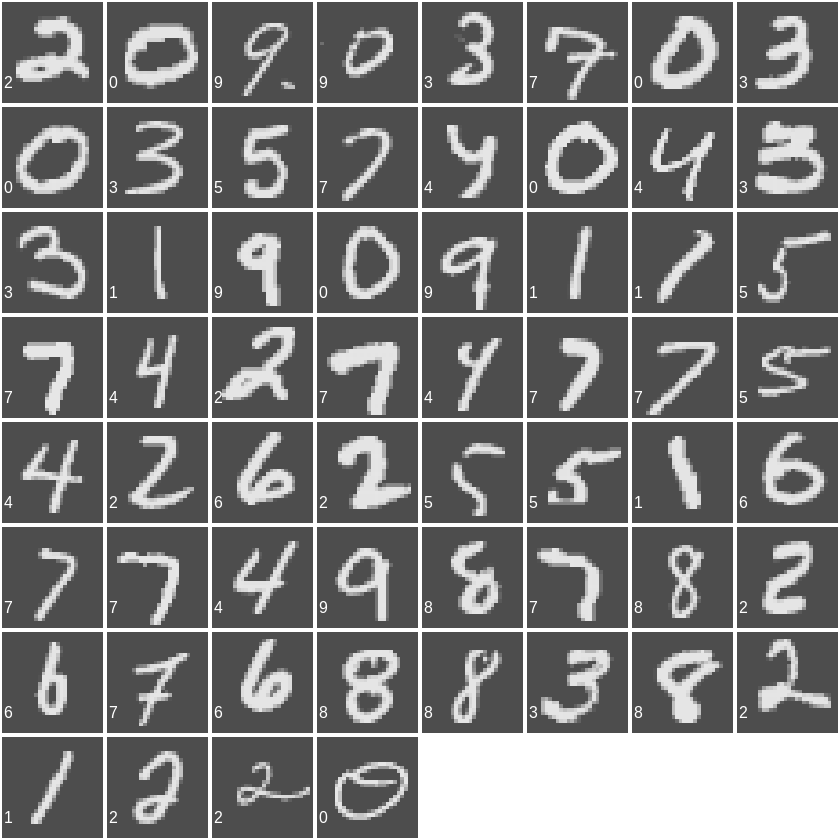

In [ ]:
graficaTest(1:60)

## Probando otro modelo en Keras

Ahora sí, a probar alguna arquitectura que resuelva el modelo, **tu segunda red neuronal usando keras**:

# LSTM

Un ejemplo de red recurrente LSTM puede ser encontrado en:
https://keras.rstudio.com/articles/examples/imdb_lstm.html